In [341]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import h5py

from shapely.geometry import Polygon
import contextily as ctx

from ast import literal_eval
import random

from modules.data_aggregation.satellite_data import create_gdf, export_gdf, import_gdf_from_shp

from modules.data_aggregation.params import CITY_BOUNDING_BOXES
from modules.ml_logic.utils import slice_picture_coords, get_sub_tile, get_all_sub_coords, get_corners

# Importing processed satellite data

In [2]:
# import GeoDataFrame
gdf_Paris_import = import_gdf_from_shp("Paris")

In [3]:
gdf_Paris_import

,LST,ele,LST_diff,ele_diff,ul_corner,ll_corner,lr_corner,ur_corner,bb,geometry
0,28.489990,45.577309,-2.315979,-28.184334,"[[2.2633263464873545, 48.81321032181281]]","[[2.2633263464873545, 48.813839888049166]]","[[2.2639559127237074, 48.813839888049166]]","[[2.2639559127237074, 48.81321032181281]]","[[2.2633263464873545, 48.81321032181281], [2.2...","POLYGON ((2.26333 48.81321, 2.26333 48.81384, ..."
1,28.549988,45.577431,-2.255981,-28.184212,"[[2.2639559127237074, 48.81321032181281]]","[[2.2639559127237074, 48.813839888049166]]","[[2.2645854789600603, 48.813839888049166]]","[[2.2645854789600603, 48.81321032181281]]","[[2.2639559127237074, 48.81321032181281], [2.2...","POLYGON ((2.26396 48.81321, 2.26396 48.81384, ..."
2,28.450012,46.947140,-2.355957,-26.814503,"[[2.2645854789600603, 48.81321032181281]]","[[2.2645854789600603, 48.813839888049166]]","[[2.2652150451964133, 48.813839888049166]]","[[2.2652150451964133, 48.81321032181281]]","[[2.2645854789600603, 48.81321032181281], [2.2...","POLYGON ((2.26459 48.81321, 2.26459 48.81384, ..."
3,29.230011,48.411678,-1.575958,-25.349964,"[[2.2652150451964133, 48.81321032181281]]","[[2.2652150451964133, 48.813839888049166]]","[[2.265844611432766, 48.813839888049166]]","[[2.265844611432766, 48.81321032181281]]","[[2.2652150451964133, 48.81321032181281], [2.2...","POLYGON ((2.26522 48.81321, 2.26522 48.81384, ..."
4,27.889984,48.643574,-2.915985,-25.118069,"[[2.265844611432766, 48.81321032181281]]","[[2.265844611432766, 48.813839888049166]]","[[2.266474177669119, 48.813839888049166]]","[[2.266474177669119, 48.81321032181281]]","[[2.265844611432766, 48.81321032181281], [2.26...","POLYGON ((2.26584 48.81321, 2.26584 48.81384, ..."
...,...,...,...,...,...,...,...,...,...,...
35023,34.149994,67.602211,3.344025,-6.159431,"[[2.4188292068665307, 48.90009046242952]]","[[2.4188292068665307, 48.90072002866587]]","[[2.4194587731028836, 48.90072002866587]]","[[2.4194587731028836, 48.90009046242952]]","[[2.4188292068665307, 48.90009046242952], [2.4...","POLYGON ((2.41883 48.90009, 2.41883 48.90072, ..."
35024,33.750000,68.582405,2.944031,-5.179237,"[[2.4194587731028836, 48.90009046242952]]","[[2.4194587731028836, 48.90072002866587]]","[[2.4200883393392365, 48.90072002866587]]","[[2.4200883393392365, 48.90009046242952]]","[[2.4194587731028836, 48.90009046242952], [2.4...","POLYGON ((2.41946 48.90009, 2.41946 48.90072, ..."
35025,33.750000,68.582405,2.944031,-5.179237,"[[2.4200883393392365, 48.90009046242952]]","[[2.4200883393392365, 48.90072002866587]]","[[2.4207179055755894, 48.90072002866587]]","[[2.4207179055755894, 48.90009046242952]]","[[2.4200883393392365, 48.90009046242952], [2.4...","POLYGON ((2.42009 48.90009, 2.42009 48.90072, ..."
35026,32.690002,70.776123,1.884033,-2.985519,"[[2.4207179055755894, 48.90009046242952]]","[[2.4207179055755894, 48.90072002866587]]","[[2.4213474718119423, 48.90072002866587]]","[[2.4213474718119423, 48.90009046242952]]","[[2.4207179055755894, 48.90009046242952], [2.4...","POLYGON ((2.42072 48.90009, 2.42072 48.90072, ..."


In [4]:
# import DataFrame
df_Paris_import = pd.read_csv('../../data/processed_data/Paris/Paris.csv')

In [5]:
df_Paris_import.bb.apply(literal_eval)[23289]

[[2.3294308013044134, 48.87113041555728],
 [2.3294308013044134, 48.87175998179364],
 [2.3300603675407663, 48.87175998179364],
 [2.3300603675407663, 48.87113041555728]]

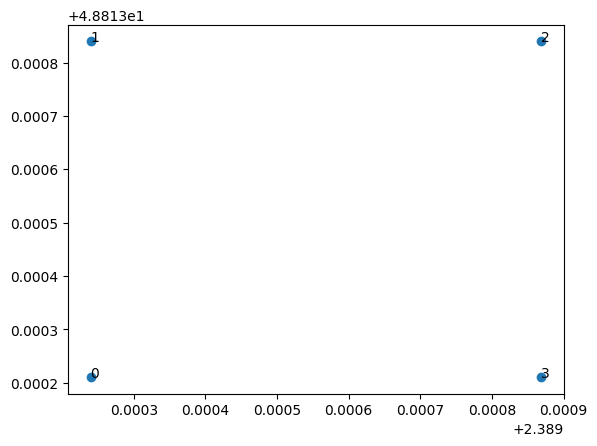

In [6]:
first_pixel = df_Paris_import.bb.apply(literal_eval)[200]
fig, ax = plt.subplots()

ax.scatter(np.array(first_pixel)[:,0], np.array(first_pixel)[:,1])

for i in range(4):
    ax.annotate(i, first_pixel[i])

In [7]:
# basic info

print(f"mean temp: {gdf_Paris_import.LST.mean()}, mean elevation: {gdf_Paris_import.ele.mean()}")
print(f"mean diff temp: {gdf_Paris_import.LST_diff.mean()}, mean diff elevation: {gdf_Paris_import.ele_diff.mean()}")
print(f"min temp: {gdf_Paris_import.LST.min()}, min elevation: {gdf_Paris_import.ele.min()}")
print(f"max temp: {gdf_Paris_import.LST.max()}, max elevation: {gdf_Paris_import.ele.max()}")
print(f"min diff temp: {gdf_Paris_import.LST_diff.min()}, min diff elevation: {gdf_Paris_import.ele_diff.min()}")
print(f"max diff temp: {gdf_Paris_import.LST_diff.max()}, max diff elevation: {gdf_Paris_import.ele_diff.max()}")


mean temp: 30.805967938400396, mean elevation: 73.76163836038451
mean diff temp: -1.2998808542451752e-06, mean diff elevation: -4.095670171452124e-06
min temp: 19.07000732421875, min elevation: 45.577308654785156
max temp: 41.329986572265625, max elevation: 135.3814697265625
min diff temp: -11.7359619140625, min diff elevation: -28.18433380126953
max diff temp: 10.524017333984375, max diff elevation: 61.61982727050781


# Importing raw satellite data 
has to be downloaded in '../../data/raw_data/{city_name}/*.h5'

In [172]:
# two different L2 files containing LST
lst_raw = h5py.File('../../data/raw_data/Paris/ECOSTRESS_L2_LSTE_23097_002_20220802T145219_0601_02.h5', 'r')

# L1 fille containing GPS coordinates
geo_raw = h5py.File('../../data/raw_data/Paris/ECOSTRESS_L1B_GEO_23097_002_20220802T145219_0601_01.h5', 'r')

In [173]:
lst_raw_array = np.array(lst_raw['SDS']['LST'], dtype = np.float32)
lst_raw_array.shape

(5632, 5400)

In [178]:
np.vstack((lst_raw_array, lst_raw_array)).shape

(11264, 5400)

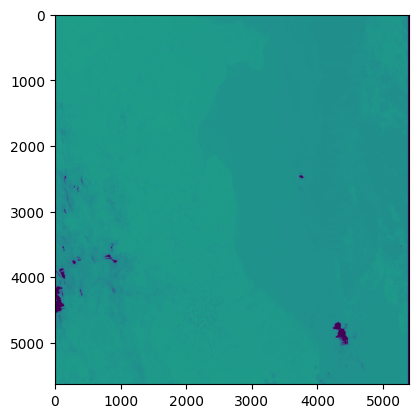

In [174]:
plt.imshow(lst_raw_array)

# Creating processed data
(if raw data availabe)

In [ ]:
# create GeoDataFrame
gdf_Paris = create_gdf("Paris")

KeyboardInterrupt: 

In [ ]:
gdf_Paris[1]['bb'][0]

[[2.2633263464873545, 48.81321032181281],
 [2.2633263464873545, 48.813839888049166],
 [2.2639559127237074, 48.813839888049166],
 [2.2639559127237074, 48.81321032181281]]

In [ ]:
gdf_Paris[1]['bb'][0]

[[2.2639559127237074, 48.81321032181281],
 [2.2639559127237074, 48.813839888049166],
 [2.2633263464873545, 48.813839888049166],
 [2.2633263464873545, 48.81321032181281]]

In [ ]:
# create & export GeoDataFrame
export_gdf("Paris")

# Plotting

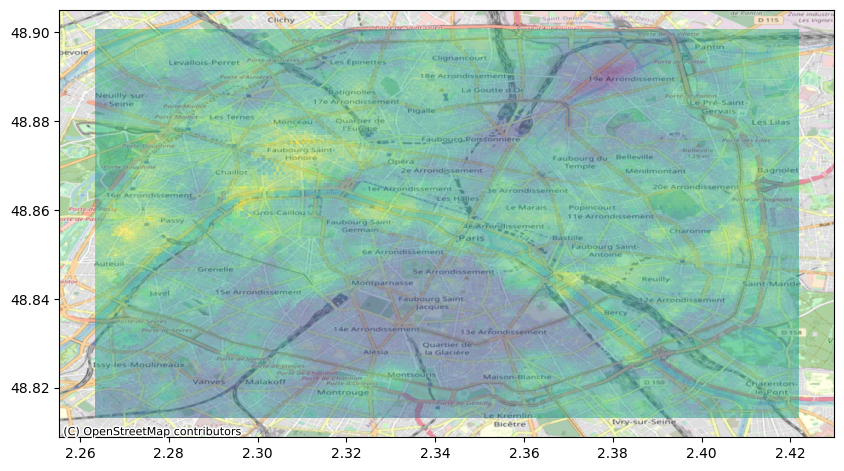

In [ ]:
fig, ax = plt.subplots(figsize = (10,15))
gdf_Paris_import.plot(column = 'LST', ax = ax, alpha = .5)
ctx.add_basemap(ax,  crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

# Slicing of image

In [610]:
tiles_coords = import_bb_array("Paris")

In [611]:
tiles_coords

array([[[ 2.26332635,  2.26332635],
        [48.81321032, 48.81321032]],

       [[ 2.26395591,  2.26395591],
        [48.81321032, 48.81321032]],

       [[ 2.26458548,  2.26458548],
        [48.81321032, 48.81321032]],

       ...,

       [[ 2.40246048,  2.40246048],
        [48.87364868, 48.87364868]],

       [[ 2.40309005,  2.40309005],
        [48.87364868, 48.87364868]],

       [[ 2.40371962,  2.40371962],
        [48.87364868, 48.87364868]]])

In [612]:
subtiles = [get_sub_tile(gdf_Paris_import, tiles_coords, i) for i in range(0, len(tiles_coords))]

KeyboardInterrupt: 

In [ ]:
subtiles[0]

In [416]:
subtiles_0 = subtiles[0].loc[:, ['LST_diff', 'ele_diff', 'ul_corner']]

In [417]:
subtiles_0['lon'] = np.array([tile[0] for tile in subtiles_0.ul_corner.apply(literal_eval)])[:,0]
subtiles_0['lat'] = np.array([tile[0] for tile in subtiles_0.ul_corner.apply(literal_eval)])[:,1]

In [126]:
subtiles_0.drop(columns = 'ul_corner', inplace = True)

In [419]:
subtiles[0].shape

(40, 10)

In [418]:
subtiles_0

,LST_diff,ele_diff,ul_corner,lon,lat
506,-2.335968,-25.800060,"[[2.2645854789600603, 48.81446945428552]]",2.264585,48.814469
507,-3.475983,-25.374969,"[[2.2652150451964133, 48.81446945428552]]",2.265215,48.814469
508,-3.555969,-26.473484,"[[2.265844611432766, 48.81446945428552]]",2.265845,48.814469
509,-3.555969,-26.473484,"[[2.266474177669119, 48.81446945428552]]",2.266474,48.814469
510,-3.555969,-28.125256,"[[2.267103743905472, 48.81446945428552]]",2.267104,48.814469
511,-3.655975,-28.081436,"[[2.267733310141825, 48.81446945428552]]",2.267733,48.814469
512,-3.715973,-28.127411,"[[2.268362876378178, 48.81446945428552]]",2.268363,48.814469
513,-3.135956,-26.545940,"[[2.2689924426145307, 48.81446945428552]]",2.268992,48.814469
514,-3.115967,-26.481808,"[[2.2696220088508836, 48.81446945428552]]",2.269622,48.814469
515,-2.355957,-28.182686,"[[2.2702515750872365, 48.81446945428552]]",2.270252,48.814469


In [420]:
subtiles_array_0 = subtiles_0.drop(columns = 'ul_corner').set_index(['lon', 'lat']).unstack()

In [451]:
subtiles_0.drop(columns = 'ul_corner').set_index(['lon', 'lat']).unstack().values

array([[ -2.33596802,  -3.57595825,  -4.39596558,  -4.39596558,
        -25.80006027, -25.71393585, -26.49670029, -26.49670029],
       [ -3.47598267,  -3.75598145,  -3.43597412,  -4.17596436,
        -25.37496948, -26.63663101, -26.18442535, -27.34636307],
       [ -3.55596924,  -3.75598145,  -3.79595947,  -4.13595581,
        -26.47348404, -28.1835289 , -26.18348312, -27.14288712],
       [ -3.55596924,  -3.43597412,  -3.43597412,  -4.15597534,
        -26.47348404, -28.18348312, -26.48662949, -26.19571304],
       [ -3.55596924,  -3.55596924,  -3.09597778,  -3.69598389,
        -28.12525558, -28.12525558, -26.2833252 , -26.36816788],
       [ -3.65597534,  -3.73596191,  -4.13595581,  -4.13595581,
        -28.08143616, -28.05550385, -27.18300629, -27.18300629],
       [ -3.7159729 ,  -3.55596924,  -4.07595825,  -3.99597168,
        -28.12741089, -28.18301392, -28.18283844, -28.14440155],
       [ -3.13595581,  -3.7159729 ,  -4.07595825,  -4.57595825,
        -26.5459404 , -28.1829605

In [421]:
subtiles_array_0

LST_diff                                 ele_diff             \
lat      48.814469 48.815099 48.815729 48.816358  48.814469  48.815099   
lon                                                                      
2.264585 -2.335968 -3.575958 -4.395966 -4.395966 -25.800060 -25.713936   
2.265215 -3.475983 -3.755981 -3.435974 -4.175964 -25.374969 -26.636631   
2.265845 -3.555969 -3.755981 -3.795959 -4.135956 -26.473484 -28.183529   
2.266474 -3.555969 -3.435974 -3.435974 -4.155975 -26.473484 -28.183483   
2.267104 -3.555969 -3.555969 -3.095978 -3.695984 -28.125256 -28.125256   
2.267733 -3.655975 -3.735962 -4.135956 -4.135956 -28.081436 -28.055504   
2.268363 -3.715973 -3.555969 -4.075958 -3.995972 -28.127411 -28.183014   
2.268992 -3.135956 -3.715973 -4.075958 -4.575958 -26.545940 -28.182961   
2.269622 -3.115967 -2.535980 -3.835968 -4.395966 -26.481808 -27.625263   
2.270252 -2.355957 -3.855957 -3.995972 -4.215973 -28.182686 -27.182789   

                                                                ul_corner  \
lat       48.815729  48.816358                                  48.814469   
lon                                                                         
2.264585 -26.496700 -26.496700  [[2.2645854789600603, 48.81446945428552]]   
2.265215 -26.184425 -27.346363  [[2.2652150451964133, 48.81446945428552]]   
2.265845 -26.183483 -27.142887   [[2.265844611432766, 48.81446945428552]]   
2.266474 -26.486629 -26.195713   [[2.266474177669119, 48.81446945428552]]   
2.267104 -26.283325 -26.368168   [[2.267103743905472, 48.81446945428552]]   
2.267733 -27.183006 -27.183006   [[2.267733310141825, 48.81446945428552]]   
2.268363 -28.182838 -28.144402   [[2.268362876378178, 48.81446945428552]]   
2.268992 -28.182838 -28.182652  [[2.2689924426145307, 48.81446945428552]]   
2.269622 -27.182667 -28.182590  [[2.2696220088508836, 48.81446945428552]]   
2.270252 -27.185352 -28.182480  [[2.2702515750872365, 48.81446945428552]]   

                                                     \
lat                                       48.815099   
lon                                                   
2.264585  [[2.2645854789600603, 48.81509902052187]]   
2.265215  [[2.2652150451964133, 48.81509902052187]]   
2.265845   [[2.265844611432766, 48.81509902052187]]   
2.266474   [[2.266474177669119, 48.81509902052187]]   
2.267104   [[2.267103743905472, 48.81509902052187]]   
2.267733   [[2.267733310141825, 48.81509902052187]]   
2.268363   [[2.268362876378178, 48.81509902052187]]   
2.268992  [[2.2689924426145307, 48.81509902052187]]   
2.269622  [[2.2696220088508836, 48.81509902052187]]   
2.270252  [[2.2702515750872365, 48.81509902052187]]   

                                                      \
lat                                        48.815729   
lon                                                    
2.264585  [[2.2645854789600603, 48.815728586758226]]   
2.265215  [[2.2652150451964133, 48.815728586758226]]   
2.265845   [[2.265844611432766, 48.815728586758226]]   
2.266474   [[2.266474177669119, 48.815728586758226]]   
2.267104   [[2.267103743905472, 48.815728586758226]]   
2.267733   [[2.267733310141825, 48.815728586758226]]   
2.268363   [[2.268362876378178, 48.815728586758226]]   
2.268992  [[2.2689924426145307, 48.815728586758226]]   
2.269622  [[2.2696220088508836, 48.815728586758226]]   
2.270252  [[2.2702515750872365, 48.815728586758226]]   

                                                     
lat                                       48.816358  
lon                                                  
2.264585  [[2.2645854789600603, 48.81635815299458]]  
2.265215  [[2.2652150451964133, 48.81635815299458]]  
2.265845   [[2.265844611432766, 48.81635815299458]]  
2.266474   [[2.266474177669119, 48.81635815299458]]  
2.267104   [[2.267103743905472, 48.81635815299458]]  
2.267733   [[2.267733310141825, 48.81635815299458]]  
2.268363   [[2.268362876378178, 48.81635815299458]]  
2.268992  [[2.2689924426145307, 48.81635815299458]]  
2.2696

In [432]:
subtiles_array_0.sort_index().drop(columns = 'ul_corner').values

array([[ -2.33596802,  -3.57595825,  -4.39596558,  -4.39596558,
        -25.80006027, -25.71393585, -26.49670029, -26.49670029],
       [ -3.47598267,  -3.75598145,  -3.43597412,  -4.17596436,
        -25.37496948, -26.63663101, -26.18442535, -27.34636307],
       [ -3.55596924,  -3.75598145,  -3.79595947,  -4.13595581,
        -26.47348404, -28.1835289 , -26.18348312, -27.14288712],
       [ -3.55596924,  -3.43597412,  -3.43597412,  -4.15597534,
        -26.47348404, -28.18348312, -26.48662949, -26.19571304],
       [ -3.55596924,  -3.55596924,  -3.09597778,  -3.69598389,
        -28.12525558, -28.12525558, -26.2833252 , -26.36816788],
       [ -3.65597534,  -3.73596191,  -4.13595581,  -4.13595581,
        -28.08143616, -28.05550385, -27.18300629, -27.18300629],
       [ -3.7159729 ,  -3.55596924,  -4.07595825,  -3.99597168,
        -28.12741089, -28.18301392, -28.18283844, -28.14440155],
       [ -3.13595581,  -3.7159729 ,  -4.07595825,  -4.57595825,
        -26.5459404 , -28.1829605

In [427]:
subtiles_array_0.sort_index()['ul_corner']

lat,48.814469,48.815099,48.815729,48.816358
lon,,,,
2.264585,"[[2.2645854789600603, 48.81446945428552]]","[[2.2645854789600603, 48.81509902052187]]","[[2.2645854789600603, 48.815728586758226]]","[[2.2645854789600603, 48.81635815299458]]"
2.265215,"[[2.2652150451964133, 48.81446945428552]]","[[2.2652150451964133, 48.81509902052187]]","[[2.2652150451964133, 48.815728586758226]]","[[2.2652150451964133, 48.81635815299458]]"
2.265845,"[[2.265844611432766, 48.81446945428552]]","[[2.265844611432766, 48.81509902052187]]","[[2.265844611432766, 48.815728586758226]]","[[2.265844611432766, 48.81635815299458]]"
2.266474,"[[2.266474177669119, 48.81446945428552]]","[[2.266474177669119, 48.81509902052187]]","[[2.266474177669119, 48.815728586758226]]","[[2.266474177669119, 48.81635815299458]]"
2.267104,"[[2.267103743905472, 48.81446945428552]]","[[2.267103743905472, 48.81509902052187]]","[[2.267103743905472, 48.815728586758226]]","[[2.267103743905472, 48.81635815299458]]"
2.267733,"[[2.267733310141825, 48.81446945428552]]","[[2.267733310141825, 48.81509902052187]]","[[2.267733310141825, 48.815728586758226]]","[[2.267733310141825, 48.81635815299458]]"
2.268363,"[[2.268362876378178, 48.81446945428552]]","[[2.268362876378178, 48.81509902052187]]","[[2.268362876378178, 48.815728586758226]]","[[2.268362876378178, 48.81635815299458]]"
2.268992,"[[2.2689924426145307, 48.81446945428552]]","[[2.2689924426145307, 48.81509902052187]]","[[2.2689924426145307, 48.815728586758226]]","[[2.2689924426145307, 48.81635815299458]]"
2.269622,"[[2.2696220088508836, 48.81446945428552]]","[[2.2696220088508836, 48.81509902052187]]","[[2.2696220088508836, 48.815728586758226]]","[[2.2696220088508836, 48.81635815299458]]"


In [180]:
number_features = 2
get_split_indices = lambda array, number_features: len(array)/number_features

indices = int(get_split_indices(subtiles_array_0.values[0], number_features))
split_array = lambda array, indices: [array[i:i+indices] for i in range(0,len(array), indices)]

print(np.array(split_array(subtiles_array_0.values[0],indices)), np.array(split_array(subtiles_array_0.values[0],indices)).T)

[[ -2.33596802  -3.57595825  -4.39596558  -4.39596558]
 [-25.80006027 -25.71393585 -26.49670029 -26.49670029]] [[ -2.33596802 -25.80006027]
 [ -3.57595825 -25.71393585]
 [ -4.39596558 -26.49670029]
 [ -4.39596558 -26.49670029]]


In [183]:
subtile_0_trans = np.array([np.array(split_array(array, indices)).T for array in subtiles_array_0.values])
subtile_0_trans.shape

(10, 4, 2)

In [214]:
subtile_0_trans[0:5,0:2,:].shape

(5, 2, 2)

In [395]:
np.load('../../data/processed_data/Paris/Paris.npy')[0]

array([[ 2.26332635,  2.26962201],
       [48.81321032, 48.81698772]])

In [268]:
def get_split_indices(data_array: np.array, number_features: int):
    """
    returns index where array has to be split
    """
    return len(data_array)/number_features

int(get_split_indices(subtiles_array_0.values[0], number_features))

4

In [269]:
def split_array(data_array: np.array, split_index:int):
    """
    returns split array
    """
    return [data_array[i:i+split_index] for i in range(0,len(data_array), split_index)]

In [532]:
import os

# processed data
INPUT_PATH = os.path.join('..','..','data','processed_data')

In [615]:
def get_sub_tiles(data: pd.DataFrame, num_px_lon: int, num_px_lat:int):
    
    # reduce size of df
    if 'geometry' in data.columns: 
        df_red = data.drop(columns=['LST', 'ele','ll_corner', 'ur_corner', 'lr_corner','bb', 'geometry'])
    else: 
        df_red = data.drop(columns=['LST', 'ele','ll_corner', 'ur_corner', 'lr_corner','bb'])

    # convert str to list
    df_red['ul_corner'] = df_red.ul_corner.apply(literal_eval)
    
    # separate into lat and lon
    df_red['lon'] = np.array([row[0] for row in df_red.ul_corner])[:,0]
    df_red['lat'] = np.array([row[0] for row in df_red.ul_corner])[:,1]
    
    # set lon, lat as index and unstack 
    data_coord_array = df_red.set_index(['lon', 'lat']).unstack().sort_index()
    data_array = data_coord_array.drop(columns = 'ul_corner').values
    coord_array = data_coord_array['ul_corner'].values

    # split data array
    number_features = len(df_red.columns)-3 # minus lat, lon, ul_corner
    split_index_data = int(get_split_indices(data_array[0], number_features))
    
    # transform data_array
    data_array_trans = np.array([np.array(split_array(array, split_index_data)).T for array in data_array])
    
    # split coords array
    split_index_coord = int(get_split_indices(coord_array[0], 1))
    
    # transform coord_array
    coord_array_trans = np.array([np.array(split_array(array, split_index_coord)).T for array in coord_array])
    
    lon_dim, lat_dim = data_array_trans.shape[:2]
    
    lon_range = range(0, lon_dim - num_px_lon, num_px_lon)
    lat_range = range(0, lat_dim - num_px_lat, num_px_lat)

    # divide data and coords into subtiles
    data_tiles = np.array([data_array_trans[i:i+num_px_lon, j:j+num_px_lat, :] for i in lon_range for j in lat_range])
    coord_tiles = np.array([coord_array_trans[i:i+num_px_lon, j:j+num_px_lat, :] for i in lon_range for j in lat_range])
    
    # print(coord_tiles[0])
    
    # select just the coord tiles boundaries
    coord_bb = np.array([[[coords[j,0,0][0][0], coords[j,0,-1][0][0]], [coords[j,0,0][0][1], coords[j,0,-1][0][1]]] for coords in coord_tiles\
                            for j in range(coord_tiles.shape[1])])
    
    
    return data_tiles, coord_tiles, coord_bb

In [555]:
def tile_whole_city(city:str, num_px_lon: int = 32, num_px_lat: int = 32):

    # import csv data
    data_in_path = os.path.join(INPUT_PATH, city, f'{city}.csv')
    print(data_in_path)

    data = pd.read_csv(data_in_path)
    data_tiles, coord_bb = get_sub_tiles(data, num_px_lon, num_px_lat)
    print(data_tiles.shape)

    # export both data and coords bounding boxes
    data_ex_path = os.path.join(INPUT_PATH, city, f'{city}_data_tiles_{num_px_lon}_{num_px_lat}.npy')
    coords_ex_path = os.path.join(INPUT_PATH, city, f'{city}_coordbb_tiles_{num_px_lon}_{num_px_lat}.npy')

    np.save(data_ex_path, data_tiles)
    np.save(coords_ex_path, coord_bb)

    return data_tiles, coord_bb

In [603]:
subtiles

[]

In [617]:
coord_tiles = get_sub_tiles(gdf_Paris_import, 32, 32)[1]

In [632]:
coord_tiles[0][0,0,0], coord_tiles[0][0,-1]

([[2.2633263464873545, 48.81321032181281]],
 array([list([[2.2633263464873545, 48.832726875139755]])], dtype=object))

In [640]:
coord_tiles[0][0,0,0][0][0], coord_tiles[0][1,-1,0][0][0], coord_tiles[0][0,0,0][0][1], coord_tiles[0][0,-1,0][0][1]

(2.2633263464873545, 2.2639559127237074, 48.81321032181281, 48.832726875139755)

In [642]:
bb = np.array([[[coords[j,0,0][0][0], coords[j+1,-1,0][0][0]], [coords[j,0,0][0][1], coords[j,-1,0][0][1]]] for coords in coord_tiles\
                            for j in range(coord_tiles.shape[1]-1)])

In [597]:
tile_whole_city("Paris")

../../data/processed_data/Paris/Paris.csv
(28, 32, 32, 2)


(array([[[[-2.31597900e+00, -2.81843340e+01],
          [-2.79595950e+00, -2.81841740e+01],
          [-2.79595950e+00, -2.81841740e+01],
          ...,
          [ 1.58401490e+00, -2.71756600e+01],
          [ 1.58401490e+00, -2.71756600e+01],
          [ 1.06402590e+00, -2.61981010e+01]],
 
         [[-2.25598140e+00, -2.81842120e+01],
          [-1.69598390e+00, -2.81668550e+01],
          [-2.83596800e+00, -2.63573150e+01],
          ...,
          [ 1.58401490e+00, -2.71756600e+01],
          [ 1.34402470e+00, -2.71836850e+01],
          [ 1.34402470e+00, -2.71836850e+01]],
 
         [[-2.35595700e+00, -2.68145030e+01],
          [-2.83596800e+00, -2.70290070e+01],
          [-2.33596800e+00, -2.58000600e+01],
          ...,
          [ 1.38403320e+00, -2.71835370e+01],
          [ 1.08401490e+00, -2.57198640e+01],
          [ 1.06402590e+00, -2.50994220e+01]],
 
         ...,
 
         [[-4.01596070e+00, -2.81822550e+01],
          [-2.97598270e+00, -2.81820640e+01],
          

In [567]:
from modules.ml_logic.utils import import_data_array, import_bb_array

In [648]:
import_data_array("Paris").shape, import_bb_array("Paris").shape

((28, 32, 32, 2), (868, 2, 2))

In [649]:
bb_0 = np.array(get_corners([import_bb_array("Paris")[0]]))

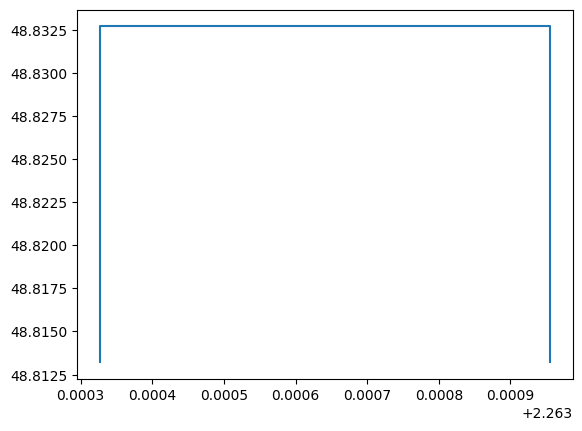

In [656]:
plt.plot(np.array(get_corners([import_bb_array("Paris")[0]]))[0][:,0], np.array(get_corners([import_bb_array("Paris")[0]]))[0][:,1])

In [596]:
import_bb_array("Paris")

array([[[ 2.26332635,  2.26332635],
        [48.81321032, 48.81321032]],

       [[ 2.26395591,  2.26395591],
        [48.81321032, 48.81321032]],

       [[ 2.26458548,  2.26458548],
        [48.81321032, 48.81321032]],

       ...,

       [[ 2.40246048,  2.40246048],
        [48.87364868, 48.87364868]],

       [[ 2.40309005,  2.40309005],
        [48.87364868, 48.87364868]],

       [[ 2.40371962,  2.40371962],
        [48.87364868, 48.87364868]]])

In [593]:
bb_0[:,: ,0][0], bb_0[:,: ,1][0]

(array([2.26332635, 2.26332635, 2.26332635, 2.26332635]),
 array([48.81321032, 48.81321032, 48.81321032, 48.81321032]))

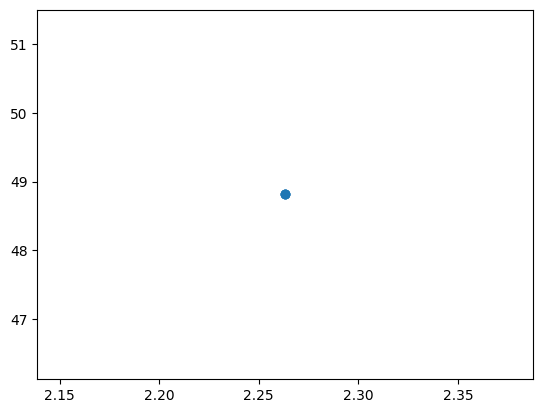

In [592]:
plt.plot(bb_0[:,: ,0][0], bb_0[:,: ,1][0], marker = 'o')

In [576]:
plt.plot(get_corners(np.load('../../data/processed_data/Paris/Paris.npy')[:2])[0])

[[2.2633263464873545, 48.81321032181281],
 [2.2633263464873545, 48.816987719230944],
 [2.2696220088508836, 48.816987719230944],
 [2.2696220088508836, 48.81321032181281]]

<AxesSubplot: >

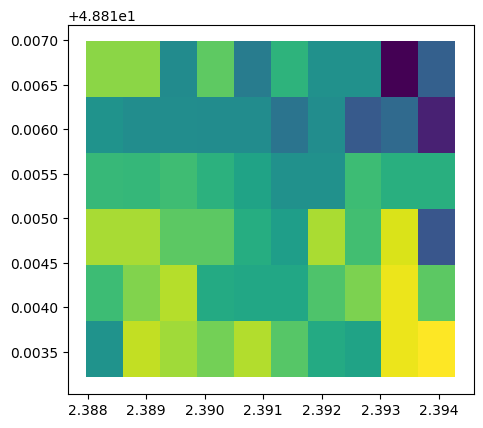

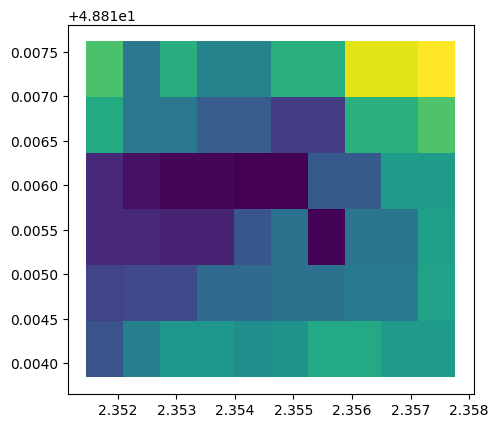

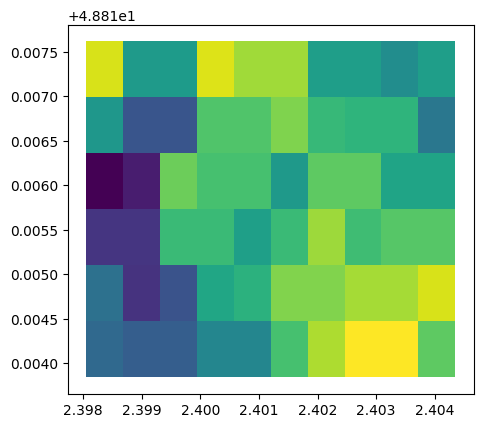

In [13]:
subtiles[random.randint(0,583)].plot(column = 'LST_diff')
subtiles[random.randint(0,583)].plot(column = 'LST_diff')
subtiles[random.randint(0,583)].plot(column = 'LST_diff')

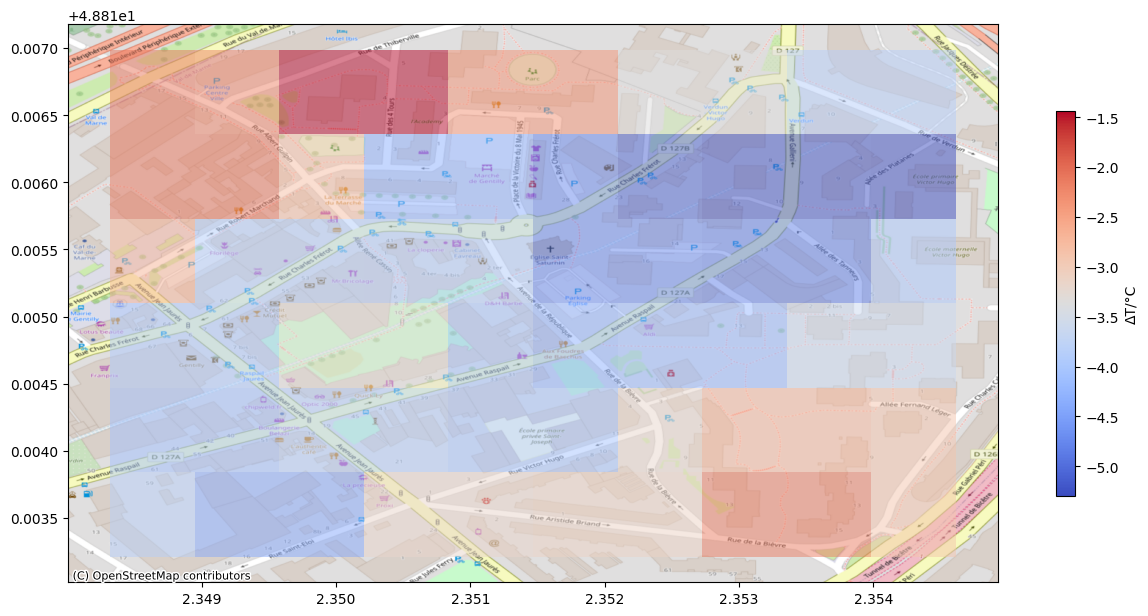

In [25]:
fig, ax = plt.subplots(figsize = (15,10))
subtiles[random.randint(0,583)].plot(column = 'LST_diff', ax = ax, alpha = .5, cmap = 'coolwarm',\
    legend = True,legend_kwds={'shrink': 0.5, 'label': 'ΔT/°C'})
ctx.add_basemap(ax,  crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

## Export numpy array with all tiles

In [396]:
df_Paris_import.drop(columns=['LST', 'ele','ll_corner', 'ur_corner', 'bb'])

,LST_diff,ele_diff,ul_corner,lr_corner
0,-2.315979,-28.184334,"[[2.2633263464873545, 48.81321032181281]]","[[2.2639559127237074, 48.813839888049166]]"
1,-2.255981,-28.184212,"[[2.2639559127237074, 48.81321032181281]]","[[2.2645854789600603, 48.813839888049166]]"
2,-2.355957,-26.814503,"[[2.2645854789600603, 48.81321032181281]]","[[2.2652150451964133, 48.813839888049166]]"
3,-1.575958,-25.349964,"[[2.2652150451964133, 48.81321032181281]]","[[2.265844611432766, 48.813839888049166]]"
4,-2.915985,-25.118069,"[[2.265844611432766, 48.81321032181281]]","[[2.266474177669119, 48.813839888049166]]"
...,...,...,...,...
35023,3.344025,-6.159432,"[[2.4188292068665307, 48.90009046242952]]","[[2.4194587731028836, 48.90072002866587]]"
35024,2.944031,-5.179237,"[[2.4194587731028836, 48.90009046242952]]","[[2.4200883393392365, 48.90072002866587]]"
35025,2.944031,-5.179237,"[[2.4200883393392365, 48.90009046242952]]","[[2.4207179055755894, 48.90072002866587]]"
35026,1.884033,-2.985519,"[[2.4207179055755894, 48.90009046242952]]","[[2.4213474718119423, 48.90072002866587]]"


In [86]:
def export_array_subslices(data: pd.DataFrame, number_divisions: int, city: str) -> np.array:
    """
    returns and exports one array containing sub-arrays of all sub-tiles
    """
    
    # drop irrelavant features
    data.drop(columns=['LST', 'ele','ll_corner','lr_corner', 'ur_corner', 'bb'])
    
    # slice coords
    slice_coords = slice_picture_coords(CITY_BOUNDING_BOXES[city], number_divisions)
    
    # get all tiles
    all_tiles = [get_sub_tile(gdf_Paris_import, slice_coords, i) for i in range(50)]
    
    # [print(all_tiles.index(tile), len(tile)) for tile in all_tiles if len(tile) > 50]
    
    return all_tiles

In [87]:
subtiles = export_array_subslices(gdf_Paris_import, 25, "Paris")

In [88]:
pd.DataFrame([len(tile) for tile in subtiles]).value_counts()

40    25
50    25
dtype: int64

In [91]:
(40*25+50*25)/50

45.0

<AxesSubplot: >

<Figure size 1200x700 with 0 Axes>

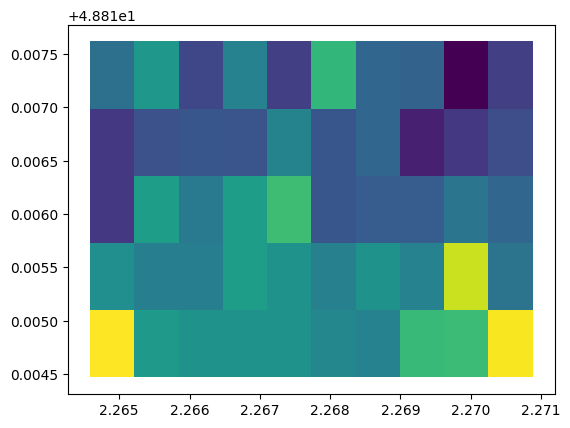

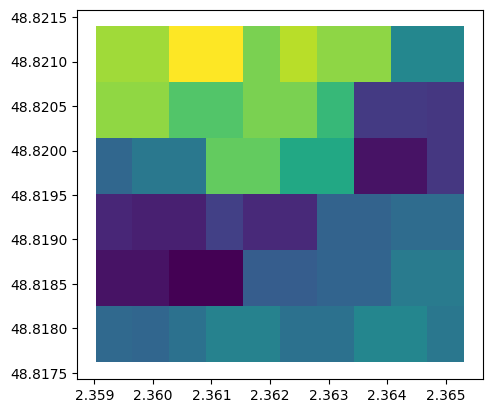

In [ ]:
plt.figure(figsize = (12,7))
subtiles[0].plot(column = 'LST_diff')
subtiles[40].plot(column = 'LST_diff')

## Slicing with overlap

In [30]:
# overlap of 20 percent of small tiles
slice_coords = get_all_sub_coords(df_Paris_import, 10,6, 20)
len(slice_coords)

583

In [51]:
np.array(get_corners([slice_coords[1]]))[0,:,0]

array([2.26269678, 2.26269678, 2.26899244, 2.26899244])

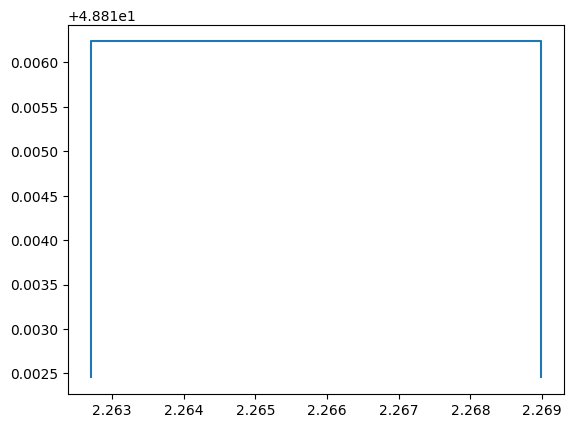

In [53]:
plt.plot(np.array(get_corners([slice_coords[1]]))[0,:,0], np.array(get_corners([slice_coords[1]]))[0,:,1])

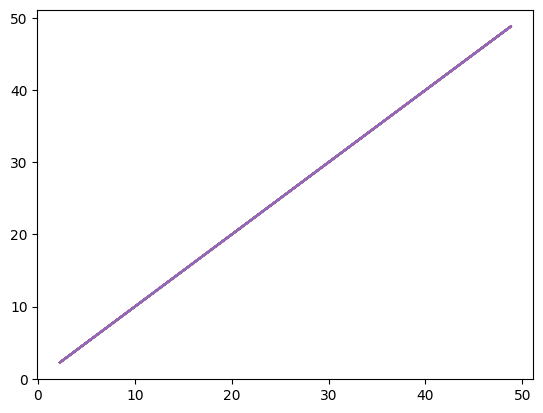

In [35]:
max_tiles = 5
corner_coords = [get_corners([slice_coords[i]]) for i in range(max_tiles)]

x_coords = [np.array(corner_coords)[i,:,0] for i in range(max_tiles)]
y_coords = [np.array(corner_coords)[i,:,1] for i in range(max_tiles)]

for i in range(max_tiles):
    plt.plot(np.append(x_coords[i],x_coords[i][0]),  np.append(y_coords[i],y_coords[i][0]))
